In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller, acf, pacf

C:\Users\dzulfi064176\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    movingAverage = timeseries.rolling(window=4).mean()
    movingSTD = timeseries.rolling(window=4).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
    std = plt.plot(movingSTD, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

    #Perform Dickey-Fuller test:
    print('Result of Dickey-Fuller Test:')
    dftest = adfuller(timeseries['Sales'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lag Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

In [3]:
df = pd.read_csv("tute1.csv")
df.shape

(100, 4)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
Unnamed: 0    100 non-null object
Sales         100 non-null float64
AdBudget      100 non-null float64
GDP           100 non-null float64
dtypes: float64(3), object(1)
memory usage: 3.2+ KB


In [5]:
df.isnull().sum()

Unnamed: 0    0
Sales         0
AdBudget      0
GDP           0
dtype: int64

In [6]:
df.head()

,Unnamed: 0,Sales,AdBudget,GDP
0,Mar-81,1020.2,659.2,251.8
1,Jun-81,889.2,589.0,290.9
2,Sep-81,795.0,512.5,290.8
3,Dec-81,1003.9,614.1,292.4
4,Mar-82,1057.7,647.2,279.1


In [7]:
df.tail()

,Unnamed: 0,Sales,AdBudget,GDP
95,Dec-04,1018.7,634.9,284.0
96,Mar-05,1112.5,663.1,270.9
97,Jun-05,997.4,583.3,294.7
98,Sep-05,826.8,508.6,292.2
99,Dec-05,992.6,634.2,255.1


In [8]:
df.rename(columns={'Unnamed: 0':'Month'}, inplace=True)

In [9]:
year = []
month = []
for i in df['Month']:
    y = i.split('-')[1]
    
    month.append(i.split('-')[0])
    if y[0]!='0':
        year.append('19'+y)
    else:
        year.append('20'+y)

In [10]:
df['Month'] = pd.to_datetime(['{}-{}-01'.format(y, m) for y, m in zip(year, month)])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
Month       100 non-null datetime64[ns]
Sales       100 non-null float64
AdBudget    100 non-null float64
GDP         100 non-null float64
dtypes: datetime64[ns](1), float64(3)
memory usage: 3.2 KB


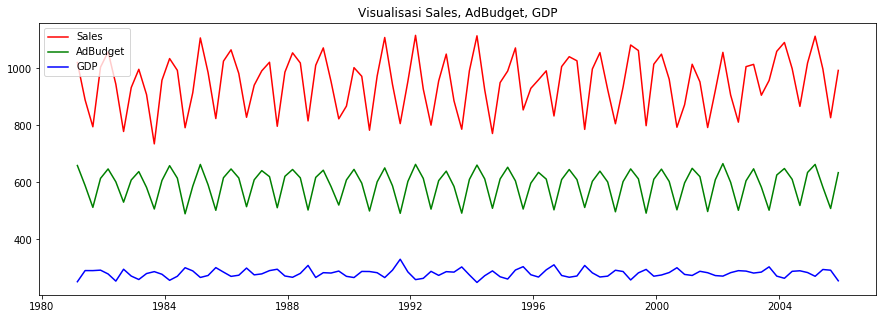

In [12]:
plt.figure(figsize=(15,5))
Sales = plt.plot(df['Month'], df['Sales'], color='red', label='Sales')
AdBudget = plt.plot(df['Month'], df['AdBudget'], color='green', label='AdBudget')
GDP = plt.plot(df['Month'], df['GDP'], color='blue', label='GDP')
plt.legend(loc='best')
plt.title('Visualisasi Sales, AdBudget, GDP')
plt.show(block=False)

In [13]:
print('Sales')
print('Results of Dickey-Fuller Test:')
dftest = adfuller(df['Sales'], autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)' %key] = value

print(dfoutput)

Sales
Results of Dickey-Fuller Test:
Test Statistic                 -3.262755
p-value                         0.016628
#Lags Used                      9.000000
Number of Observations Used    90.000000
Critical Value (1%)            -3.505190
Critical Value (5%)            -2.894232
Critical Value (10%)           -2.584210
dtype: float64


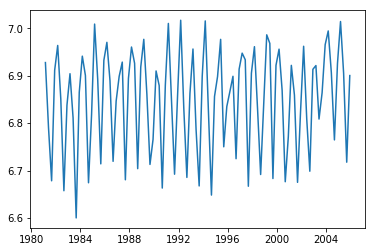

In [14]:
data_sales = pd.DataFrame(df['Sales']).set_index(df['Month'])
sales_log = np.log(data_sales)
plt.plot(sales_log)
# Sales_log = pd.DataFrame(np.log(df['Sales']))
# Sales_log = Sales_log.set_index(df['Month'])

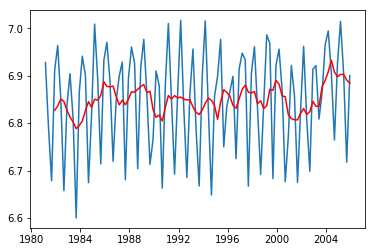

In [15]:
movingAverage = sales_log.rolling(window=4).mean()
movingSTD = sales_log.rolling(window=4).std()
plt.plot(sales_log)
plt.plot(movingAverage, color='red')

In [16]:
datasetLogScaleMinusMovingAverage = sales_log - movingAverage
datasetLogScaleMinusMovingAverage.head(12)

# Remove Nan Values
datasetLogScaleMinusMovingAverage.dropna(inplace=True)
datasetLogScaleMinusMovingAverage.head(10)

,Sales
Month,
1981-12-01,0.084631
1982-03-01,0.127811
1982-06-01,-0.000548
1982-09-01,-0.188486
1982-12-01,0.010459
1983-03-01,0.091740
1983-06-01,0.008314
1983-09-01,-0.188253
1983-12-01,0.069922


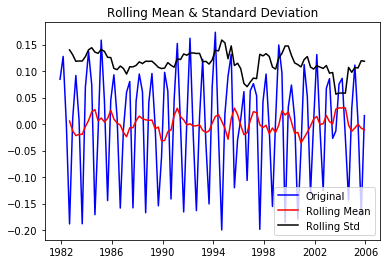

Result of Dickey-Fuller Test:
Test Statistic                 -4.747865
p-value                         0.000068
#Lag Used                       9.000000
Number of Observations Used    87.000000
Critical Value (1%)            -3.507853
Critical Value (5%)            -2.895382
Critical Value (10%)           -2.584824
dtype: float64


In [17]:
test_stationarity(datasetLogScaleMinusMovingAverage)

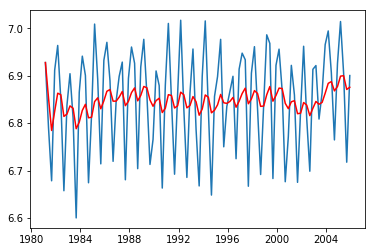

In [18]:
exponentialDecayWeightedAverage = sales_log.ewm(halflife=4, min_periods=0, adjust=True).mean()
plt.plot(sales_log)
plt.plot(exponentialDecayWeightedAverage, color='red')

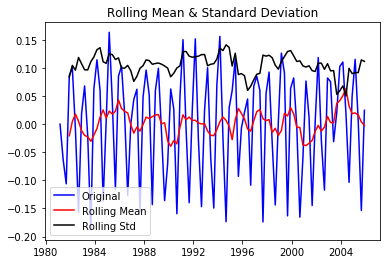

Result of Dickey-Fuller Test:
Test Statistic                 -3.666622
p-value                         0.004608
#Lag Used                       8.000000
Number of Observations Used    91.000000
Critical Value (1%)            -3.504343
Critical Value (5%)            -2.893866
Critical Value (10%)           -2.584015
dtype: float64


In [19]:
datasetLogScaleMinusMovingExponentialDecayAverage = sales_log -  exponentialDecayWeightedAverage
test_stationarity(datasetLogScaleMinusMovingExponentialDecayAverage)

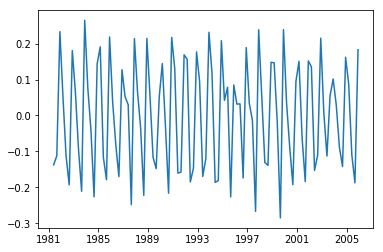

In [20]:
datasetLogDiffShifting = sales_log - sales_log.shift()
plt.plot(datasetLogDiffShifting)

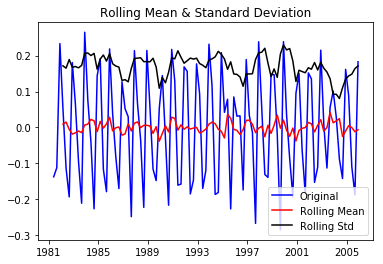

Result of Dickey-Fuller Test:
Test Statistic                 -5.098185
p-value                         0.000014
#Lag Used                      10.000000
Number of Observations Used    88.000000
Critical Value (1%)            -3.506944
Critical Value (5%)            -2.894990
Critical Value (10%)           -2.584615
dtype: float64


In [21]:
datasetLogDiffShifting.dropna(inplace=True)
test_stationarity(datasetLogDiffShifting)

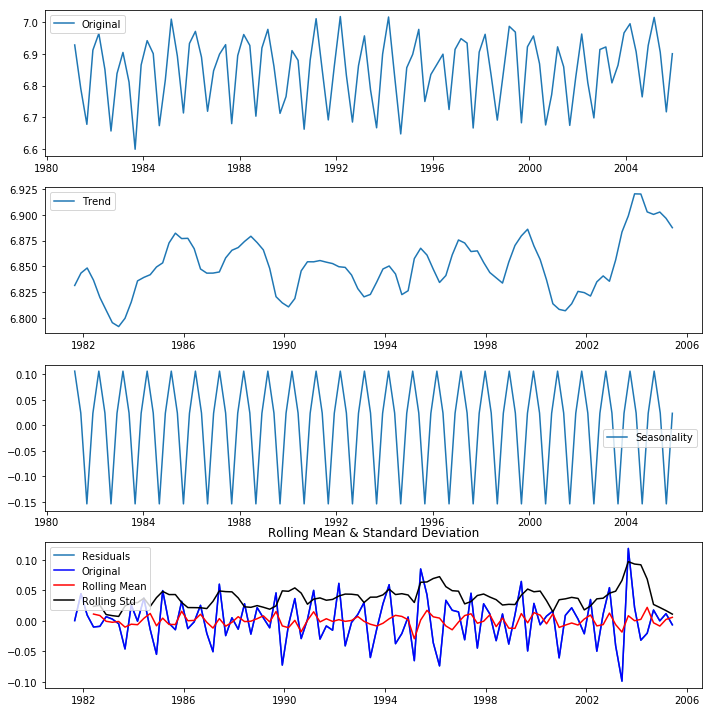

Result of Dickey-Fuller Test:
Test Statistic                -6.204835e+00
p-value                        5.690975e-08
#Lag Used                      8.000000e+00
Number of Observations Used    8.700000e+01
Critical Value (1%)           -3.507853e+00
Critical Value (5%)           -2.895382e+00
Critical Value (10%)          -2.584824e+00
dtype: float64


In [22]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(sales_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(10,10))
plt.subplot(411)
plt.plot(sales_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)

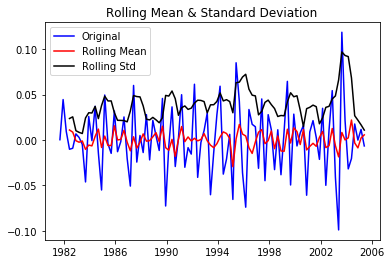

Result of Dickey-Fuller Test:
Test Statistic                -6.204835e+00
p-value                        5.690975e-08
#Lag Used                      8.000000e+00
Number of Observations Used    8.700000e+01
Critical Value (1%)           -3.507853e+00
Critical Value (5%)           -2.895382e+00
Critical Value (10%)          -2.584824e+00
dtype: float64


In [23]:
decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)

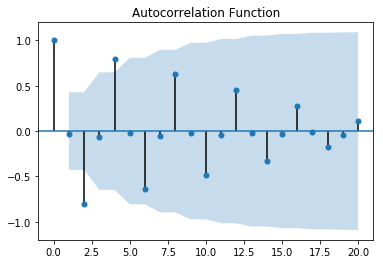

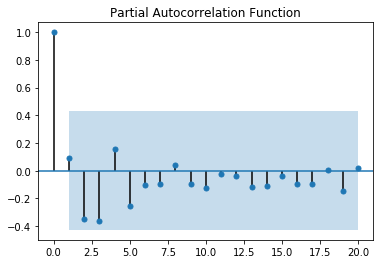

In [48]:
#ACF and PACF plots:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

lag_acf = acf(datasetLogDiffShifting, nlags=20)
lag_pacf = pacf(datasetLogDiffShifting, nlags=20, method='ols')


#Plot ACF:
# plt.subplot(121)
#plt.plot(lag_acf)
plot_acf(lag_acf)
# plt.axhline(y=0,linestyle='--',color='gray')
# plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
# plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')
plt.show()

#Plot PACF:
# plt.subplot(122)
# plt.plot(lag_pacf)
plot_pacf(lag_pacf)#, lags=20)
# plt.axhline(y=0,linestyle='--',color='gray')
# plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
# plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
#plt.tight_layout()
plt.show()

C:\Users\dzulfi064176\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\Users\dzulfi064176\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
C:\Users\dzulfi064176\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtyp

Plotting AR model


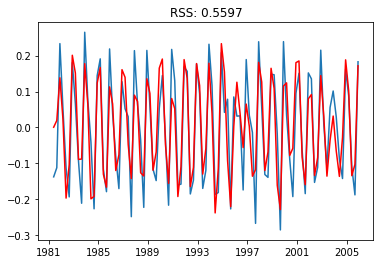

In [61]:
#AR MODEL
model = ARIMA(sales_log, order=(2,1,2))
results_ARIMA = model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-datasetLogDiffShifting["Sales"])**2))
print('Plotting AR model')

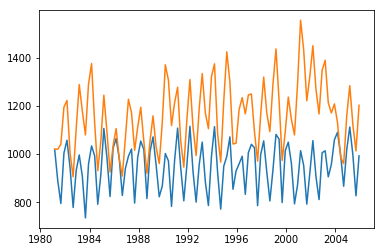

In [62]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()

predictions_ARIMA_log = pd.Series(sales_log['Sales'].ix[0], index=sales_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)

predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(data_sales)
plt.plot(predictions_ARIMA)

C:\Users\dzulfi064176\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


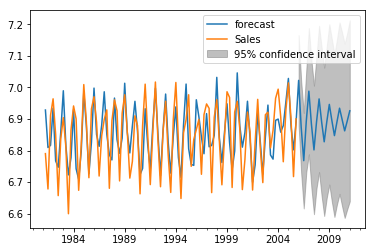

In [63]:
results_ARIMA.plot_predict(1,120)
x=results_ARIMA.forecast(steps=120)

In [65]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(x[0], x[1])

6.726164913774118